   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

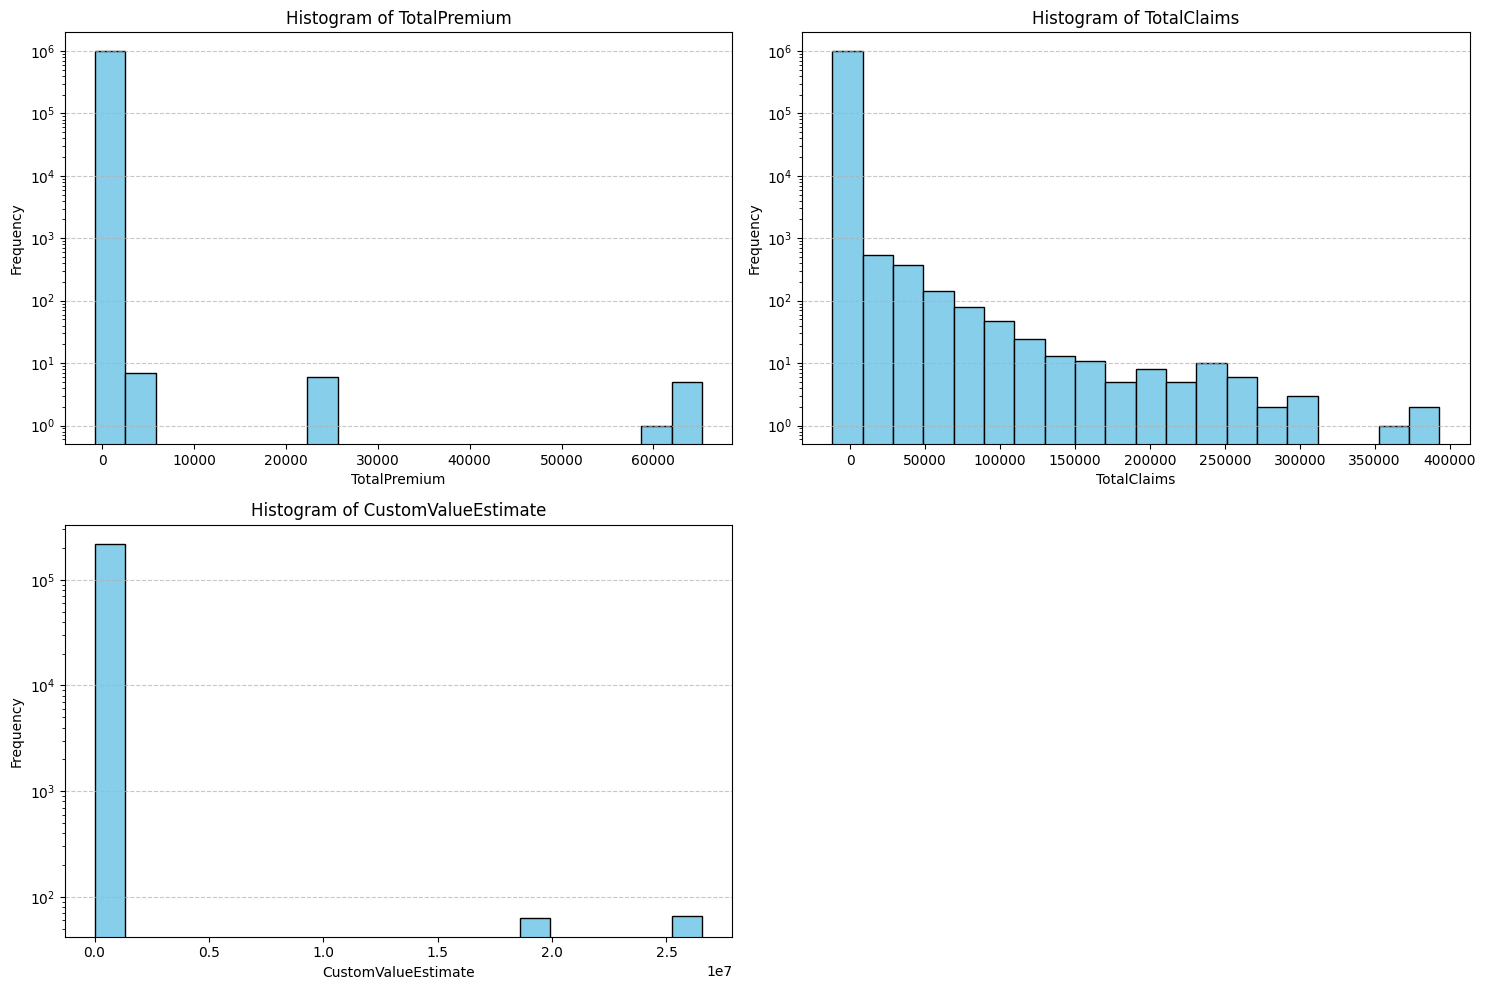

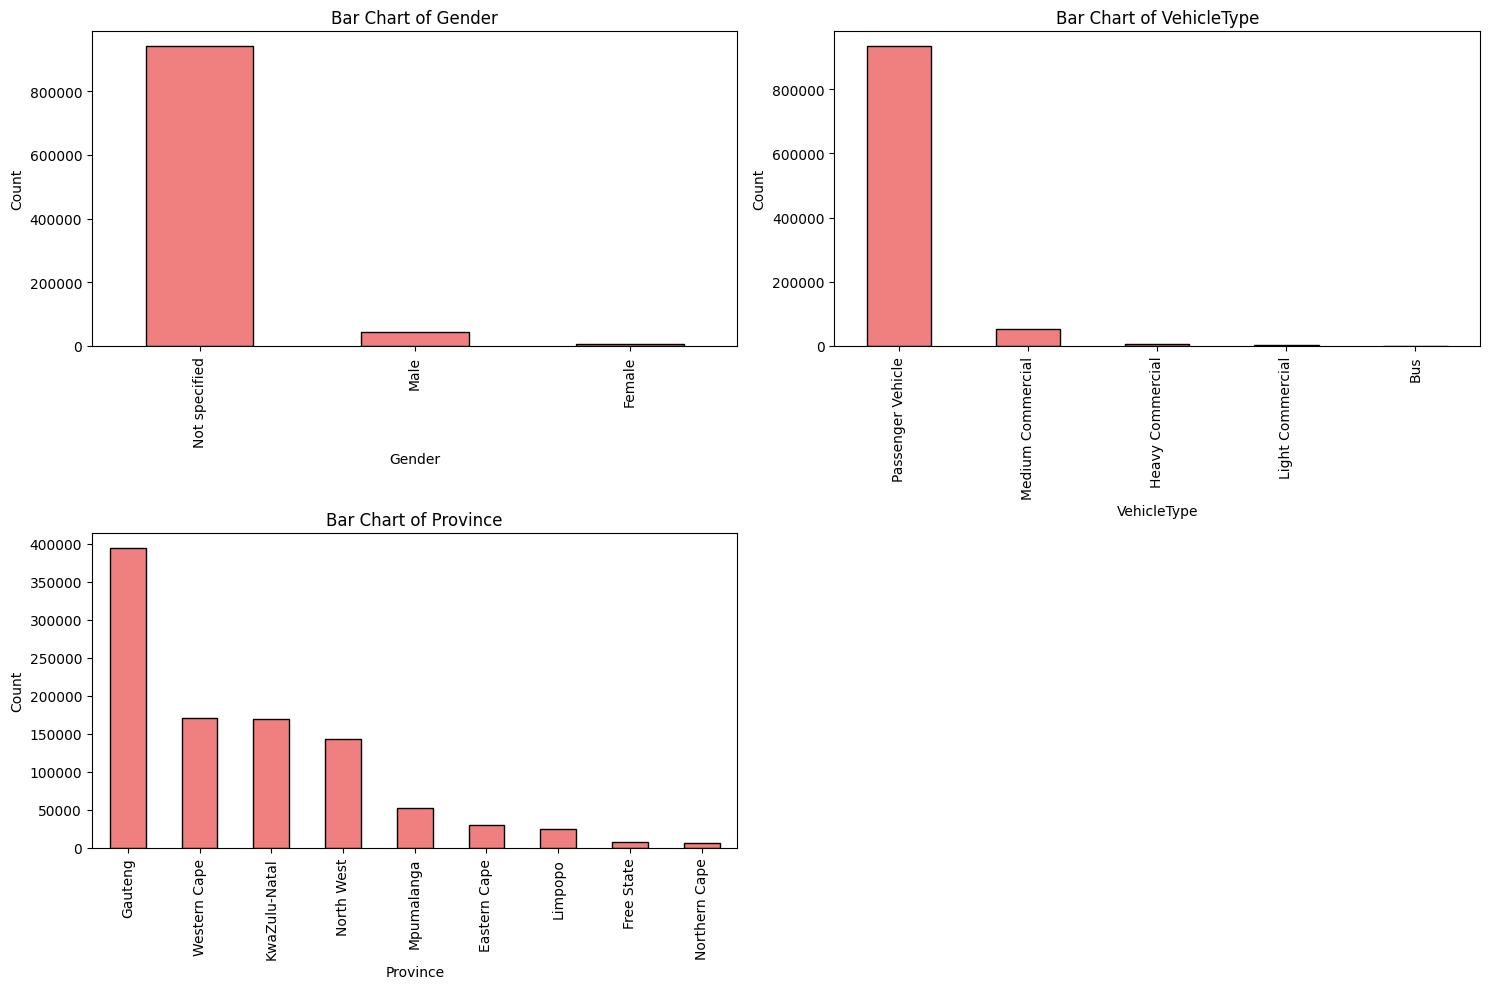

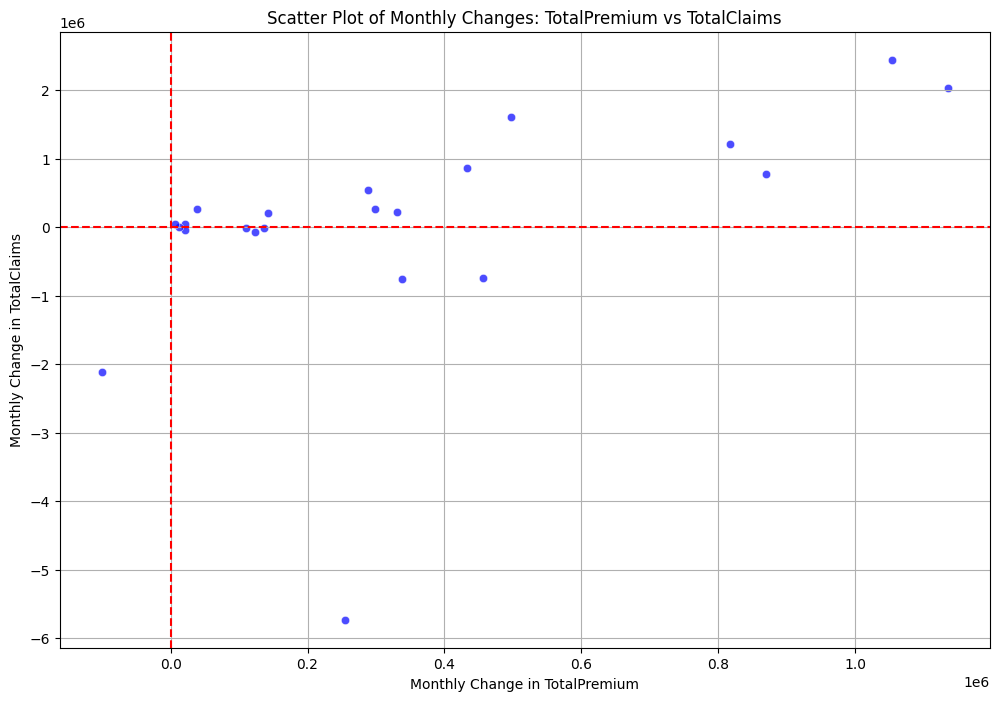

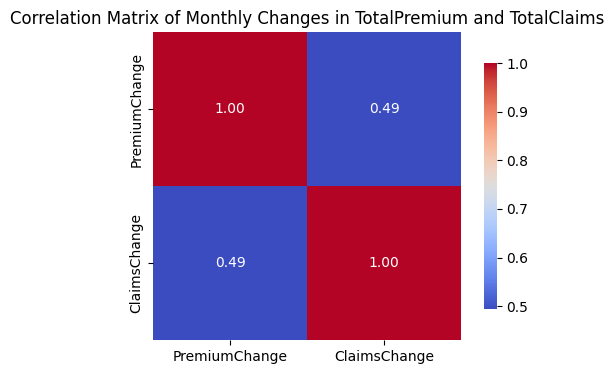

Non-zero TotalClaims count: 2788


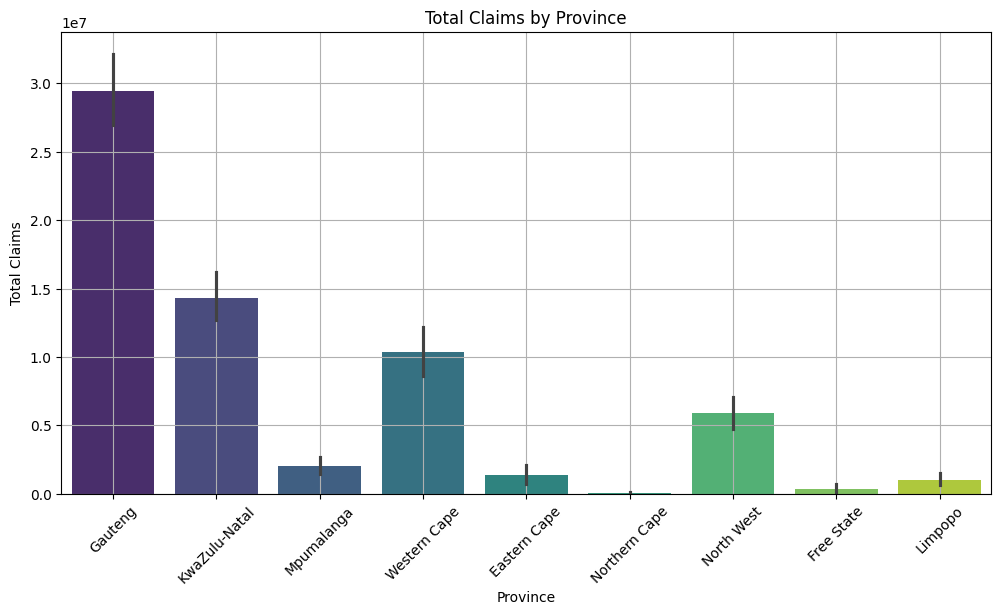

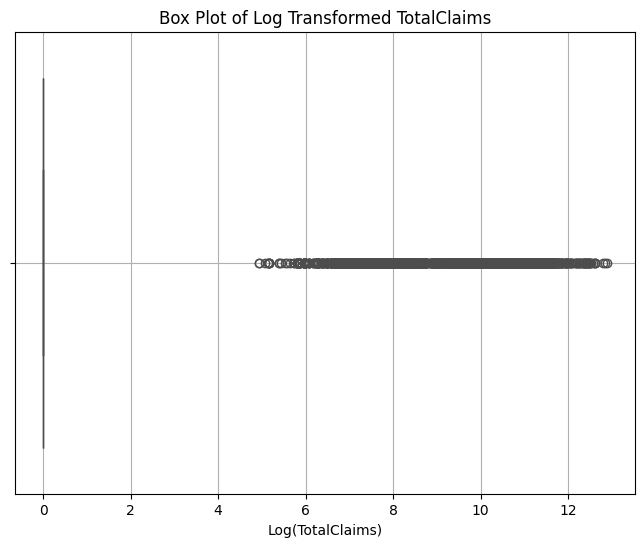

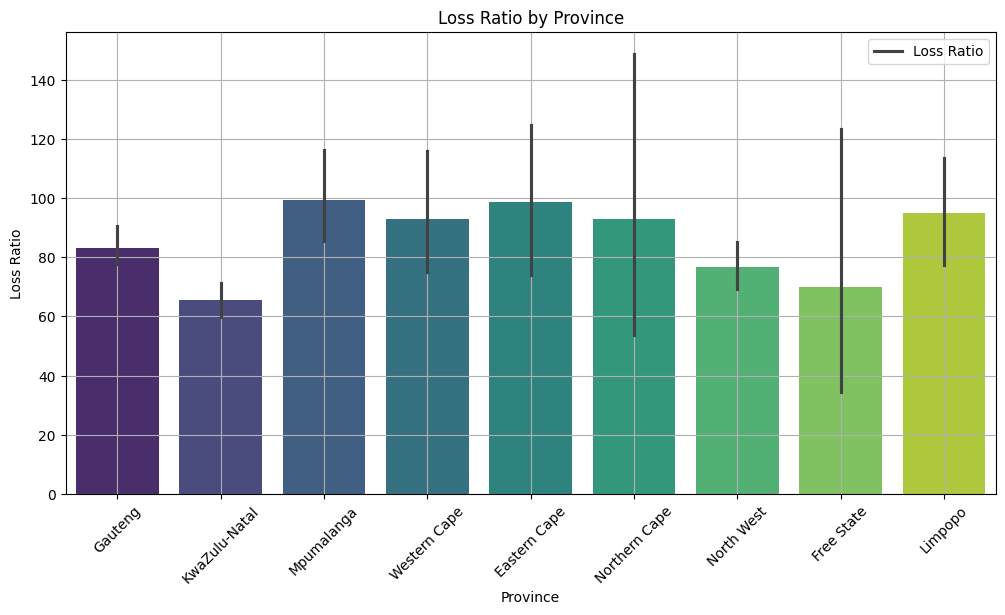

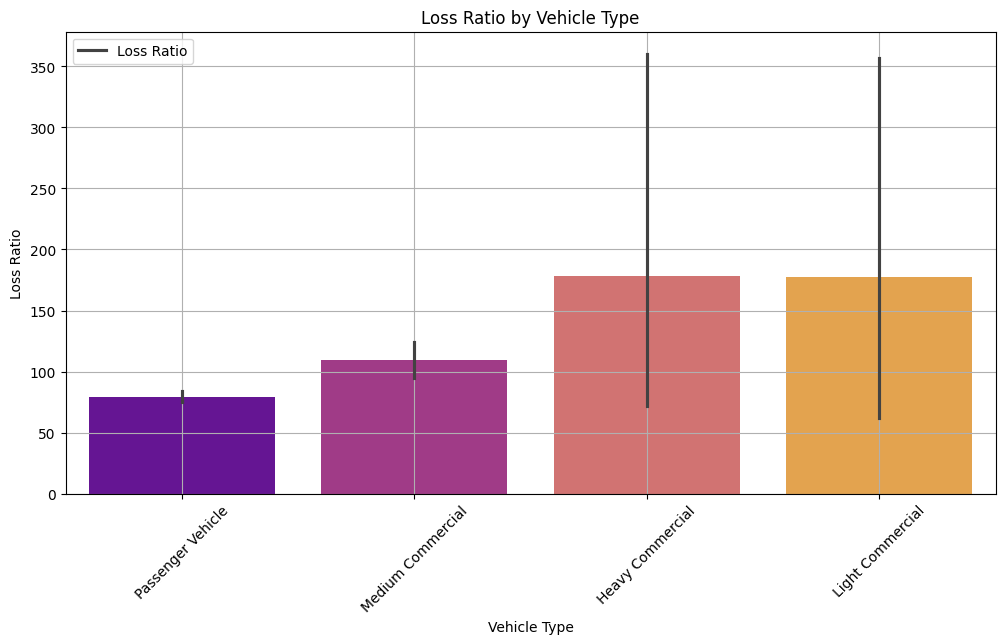

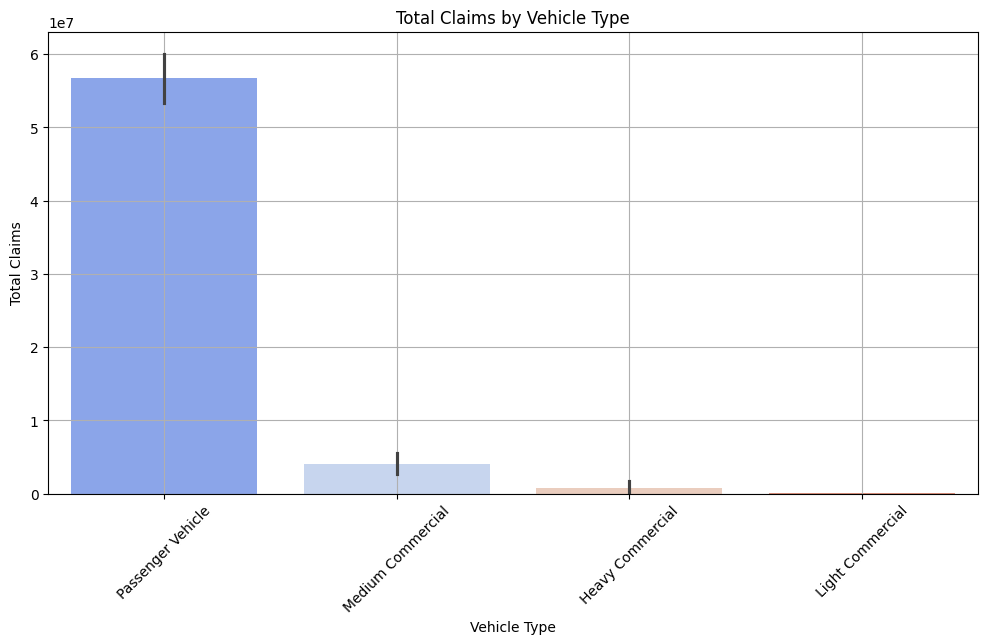

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas as pd
import os
import warnings
import numpy as np
import sys
os.chdir(r'C:\Wk 3 Car Insurance Risk & Marketing Analytics\Car-insurance-risk-analysis')
sys.path.append(os.getcwd())  
warnings.filterwarnings("ignore")
DATA_DIR = 'notebooks/data'
# Load the data
data = pd.read_csv(os.path.join(DATA_DIR, 'MachineLearningRating_v3.txt'), sep='|')
# Inspect the data
print(data.head())
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values

numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']

# Create histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)

    plt.hist(data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
   
    if data[col].dropna().max() > 1000:  # Adjust threshold as necessary
        plt.yscale('log')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# List of categorical columns
categorical_cols = ['Gender', 'VehicleType', 'Province']

# Create bar charts for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    data[col].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data['TotalPremium'] = pd.to_numeric(data['TotalPremium'], errors='coerce')
data['TotalClaims'] = pd.to_numeric(data['TotalClaims'], errors='coerce')

data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])

monthly_data = data.groupby(data['TransactionMonth'].dt.to_period('M')).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()

monthly_data['PremiumChange'] = monthly_data['TotalPremium'].diff()
monthly_data['ClaimsChange'] = monthly_data['TotalClaims'].diff()

monthly_data = monthly_data.dropna()

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=monthly_data, x='PremiumChange', y='ClaimsChange', color='blue', alpha=0.7)
plt.title('Scatter Plot of Monthly Changes: TotalPremium vs TotalClaims')
plt.xlabel('Monthly Change in TotalPremium')
plt.ylabel('Monthly Change in TotalClaims')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--') 
plt.axvline(0, color='red', linestyle='--')
plt.show()

correlation_matrix = monthly_data[['PremiumChange', 'ClaimsChange']].corr()
# Plotting the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Monthly Changes in TotalPremium and TotalClaims')
plt.show()

# Ensure that 'TotalClaims' is numeric
data['TotalClaims'] = pd.to_numeric(data['TotalClaims'], errors='coerce')
data = data.dropna(subset=['TotalClaims', 'Province'])

# Check for non-zero TotalClaims
non_zero_claims = data[data['TotalClaims'] > 0]
print("Non-zero TotalClaims count:", non_zero_claims.shape[0])

if not non_zero_claims.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Province', y='TotalClaims', data=non_zero_claims, estimator=sum, palette='viridis')
    plt.title('Total Claims by Province')
    plt.xlabel('Province')
    plt.ylabel('Total Claims')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show(block=True)
else:
    print("No non-zero TotalClaims to plot.")

# Box plot for TotalClaims
import numpy as np

data['LogTotalClaims'] = np.log1p(data['TotalClaims'])

# Box plot for Log of TotalClaims
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['LogTotalClaims'], color='yellow')
plt.title('Box Plot of Log Transformed TotalClaims')
plt.xlabel('Log(TotalClaims)')
plt.grid(True)
plt.show()

data_filtered = data[(data['TotalClaims'].notnull()) & (data['TotalPremium'].notnull()) & 
                     (data['TotalClaims'] > 0) & (data['TotalPremium'] > 0)]
data_filtered['LossRatio'] = data_filtered['TotalClaims'] / data_filtered['TotalPremium']
# Bar plot for Loss Ratio by Province
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='LossRatio', data=data_filtered, palette='viridis')
plt.title('Loss Ratio by Province')
plt.xlabel('Province')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.legend(['Loss Ratio'])
plt.grid(True)
plt.show()
# Bar plot for Loss Ratio by VehicleType
plt.figure(figsize=(12, 6))
sns.barplot(x='VehicleType', y='LossRatio', data=data_filtered, palette='plasma')
plt.title('Loss Ratio by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.legend(['Loss Ratio'])
plt.grid(True)
plt.show()

data_filtered = data[(data['TotalClaims'].notnull()) & 
                     (data['TotalClaims'] > 0) & 
                     (data['TotalPremium'].notnull()) & 
                     (data['TotalPremium'] > 0)]

# Ensure TotalClaims is numeric
data_filtered['TotalClaims'] = pd.to_numeric(data_filtered['TotalClaims'], errors='coerce')

# Bar plot for TotalClaims by VehicleType using the filtered data
if not data_filtered.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='VehicleType', y='TotalClaims', data=data_filtered, estimator=sum, palette='coolwarm')
    plt.title('Total Claims by Vehicle Type')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Total Claims')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("No  plot.")

data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])
